1 heat map, 1 spatial chart and 1 contour chart using Python

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas



In [2]:
base_path = os.getcwd()
base_path

'/Users/sohantha/Documents/Sohan Thakur/Personal/Bellevue University/DSC640/Week9_10'

In [3]:
!ls

Week9_10                      ex5-2
Week_9_10_python_Part_I.ipynb ex5-2.zip
costcos-geocoded.csv          ppg2008.csv


In [4]:
costco_geocode_path = base_path+'/'+"costcos-geocoded.csv"
ppg_2008_path = base_path+'/'+"ppg2008.csv"

In [5]:
df_costco_geocode = pd.read_csv(costco_geocode_path)
df_ppg_2008 = pd.read_csv(ppg_2008_path)

In [6]:
df_costco_geocode.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [7]:
df_ppg_2008.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [63]:
df_ppg_2008_sample = df_ppg_2008[['ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK']]
df_ppg_2008_sample = df_ppg_2008_sample.head(10)

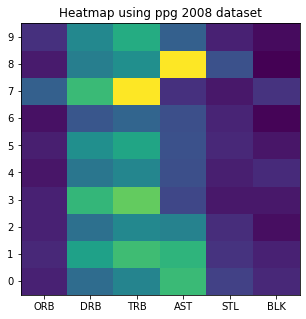

In [64]:
plt.pcolor(df_ppg_2008_sample)
plt.yticks(np.arange(0.5, len(df_ppg_2008_sample.index), 1), df_ppg_2008_sample.index)
plt.xticks(np.arange(0.5, len(df_ppg_2008_sample.columns), 1), df_ppg_2008_sample.columns)
plt.title("Heatmap using ppg 2008 dataset")
plt.show()


In [65]:
gdf = geopandas.GeoDataFrame(
    df_costco_geocode, geometry=geopandas.points_from_xy(df_costco_geocode.Longitude, df_costco_geocode.Latitude))

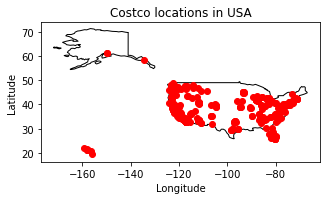

In [66]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


# We restrict to USA.
ax = world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.title("Costco locations in USA")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Text(0.5, 1.0, 'Countour plot for ORB,DRB and a function of ORB,DRB')

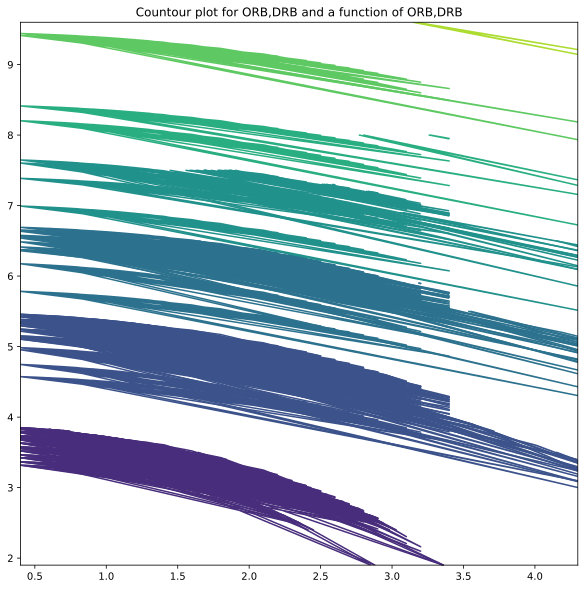

In [86]:
#Countour plot
x = df_ppg_2008.ORB
y = df_ppg_2008.DRB
X, Y = np.meshgrid(x, y)
Z = np.square(X) + np.square(Y)
plt.contour(X, Y, Z)
plt.title("Countour plot for ORB,DRB and a function of ORB,DRB")


In [87]:
df_ppg_2008.corr()

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
G,1.000000,0.186866,0.063099,0.039922,-0.059581,0.180875,-0.011056,0.009983,0.039469,0.138762,0.106132,0.124935,0.054876,0.115330,0.095680,0.142441,-0.033838,0.125587,-0.051218,-0.028372
MIN,0.186866,1.000000,0.403883,0.297420,0.413101,-0.218011,0.265562,0.181878,0.223845,0.134413,0.130734,0.106795,-0.073281,0.049165,0.005783,0.275151,0.331295,-0.066443,0.316904,-0.387609
PTS,0.063099,0.403883,1.000000,0.852261,0.828392,0.067161,0.667786,0.611409,0.030490,0.028281,0.044990,0.007157,0.007552,0.249159,0.173261,0.220795,0.361697,0.236802,0.343304,-0.150233
FGM,0.039922,0.297420,0.852261,1.000000,0.871049,0.268118,0.281119,0.292160,-0.128330,-0.233191,-0.215467,-0.090980,0.230899,0.380277,0.344299,0.106198,0.217720,0.330224,0.140205,-0.117188
FGA,-0.059581,0.413101,0.828392,0.871049,1.000000,-0.233212,0.249641,0.173999,0.113445,0.097139,0.135048,-0.023221,-0.096734,0.076602,0.020818,0.172407,0.327577,-0.000694,0.157998,-0.235652
FGP,0.180875,-0.218011,0.067161,0.268118,-0.233212,1.000000,0.069158,0.254235,-0.524097,-0.637242,-0.673994,-0.161036,0.662932,0.614529,0.654599,-0.160528,-0.228928,0.675726,-0.016609,0.258301
FTM,-0.011056,0.265562,0.667786,0.281119,0.249641,0.069158,1.000000,0.946365,-0.032534,-0.144279,-0.130957,-0.018012,0.011582,0.240176,0.165459,0.231774,0.299572,0.234402,0.539411,0.032845
FTA,0.009983,0.181878,0.611409,0.292160,0.173999,0.254235,0.946365,1.000000,-0.334383,-0.285762,-0.267314,-0.208422,0.210608,0.396417,0.342049,0.155229,0.261716,0.421167,0.524913,0.115829
FTP,0.039469,0.223845,0.030490,-0.128330,0.113445,-0.524097,-0.032534,-0.334383,1.000000,0.529798,0.498598,0.604157,-0.615159,-0.530827,-0.579798,0.200501,0.067211,-0.541254,-0.024148,-0.254517
3PM,0.138762,0.134413,0.028281,-0.233191,0.097139,-0.637242,-0.144279,-0.285762,0.529798,1.000000,0.985723,0.311400,-0.637058,-0.586855,-0.628241,0.093318,0.164684,-0.488288,-0.105597,-0.254850


In [88]:
df_ppg_2008

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,...,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,...,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,Carmelo Anthony,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,...,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0
